In [63]:
import numpy
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()

from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import Imputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler

In [2]:
dataset = pd.read_csv(r"C:\Users\DIU\Desktop\pima_indian_diabetes.csv")

In [3]:
dataset.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,NaN,1.3790,True
1,1,85,66,29,0,26.6,0.351,31.0,1.1426,False
2,8,183,64,0,0,23.3,0.672,32.0,0.0000,True
3,1,89,66,23,94,28.1,0.167,21.0,0.9062,False
4,0,137,40,35,168,43.1,2.288,33.0,1.3790,True


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
num_preg        768 non-null int64
glucose_conc    768 non-null int64
diastolic_bp    768 non-null int64
thickness       768 non-null int64
insulin         768 non-null int64
bmi             768 non-null float64
diab_pred       768 non-null float64
age             766 non-null float64
skin            768 non-null float64
diabetes        768 non-null bool
dtypes: bool(1), float64(4), int64(5)
memory usage: 54.8 KB


In [5]:
dataset.describe()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,766.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.232376,0.809136
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.754161,0.628517
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.906200
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.260800
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,3.900600


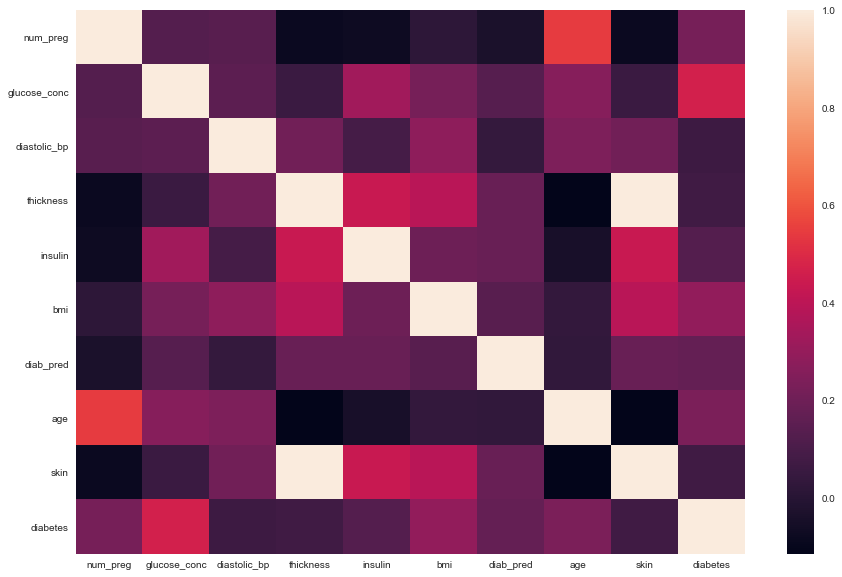

In [6]:
fig, ax = plt.subplots(figsize = (15, 10))
ax = sns.heatmap(dataset.corr())

In [7]:
del dataset["skin"]

In [8]:
dataset.isnull().sum()

num_preg        0
glucose_conc    0
diastolic_bp    0
thickness       0
insulin         0
bmi             0
diab_pred       0
age             2
diabetes        0
dtype: int64

In [9]:
dataset["age"] = dataset["age"].fillna(0)

In [10]:
# glucose_conc, diastolic_bp, thickness, insulin, bmi, age
missing_valued_feature = ["glucose_conc", "diastolic_bp", "thickness", "insulin", "bmi", "age"]

impute = Imputer(missing_values=0, strategy="median", axis=0)
dataset[missing_valued_feature] = impute.fit_transform(dataset[missing_valued_feature])

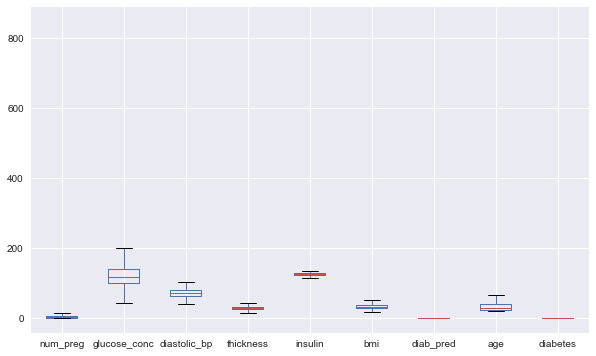

In [11]:
# visualize outliers
plt.subplots(figsize=(10,6))
dataset.boxplot()

In [12]:
diabetes_map = {True:1, False:0}
dataset["diabetes"] = dataset["diabetes"].map(diabetes_map)

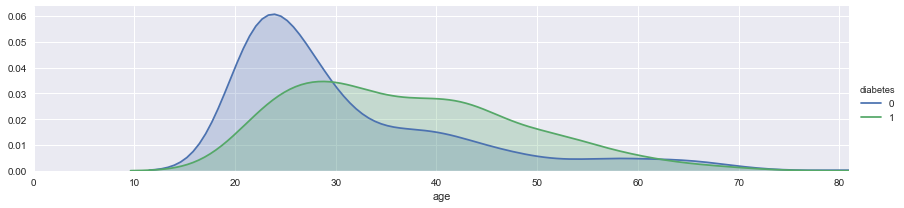

In [13]:
facet = sns.FacetGrid(dataset, hue="diabetes",aspect=4)
facet.map(sns.kdeplot,"age",shade= True)
facet.set(xlim=(0, dataset["age"].max()))
facet.add_legend()

plt.show()

In [29]:
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1:]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0)

In [58]:
model = Sequential()

model.add(Dense(15, input_dim=8, activation="relu"))
model.add(Dense(12, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(10, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(loss = "binary_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(X_train, y_train, batch_size=10, epochs=1000)

Epoch 1/1000
652/652 [==============================] - 1s 2ms/step - loss: 0.9757 - acc: 0.6534
Epoch 2/1000
652/652 [==============================] - 0s 272us/step - loss: 0.8043 - acc: 0.6457
Epoch 3/1000
652/652 [==============================] - 0s 307us/step - loss: 0.7378 - acc: 0.6672
Epoch 4/1000
652/652 [==============================] - 0s 424us/step - loss: 0.6977 - acc: 0.6350
Epoch 5/1000
652/652 [==============================] - 0s 510us/step - loss: 0.6533 - acc: 0.6840
Epoch 6/1000
652/652 [==============================] - 0s 542us/step - loss: 0.6349 - acc: 0.6580
Epoch 7/1000
652/652 [==============================] - 0s 516us/step - loss: 0.6259 - acc: 0.6718
Epoch 8/1000
652/652 [==============================] - 0s 565us/step - loss: 0.6193 - acc: 0.6656
Epoch 9/1000
652/652 [==============================] - 0s 534us/step - loss: 0.6301 - acc: 0.6580
Epoch 10/1000
652/652 [==============================] - 0s 405us/step - loss: 0.6082 - acc: 0.6856
Epoch 11/10

652/652 [==============================] - 0s 341us/step - loss: 0.5040 - acc: 0.7485
Epoch 83/1000
652/652 [==============================] - 0s 338us/step - loss: 0.5237 - acc: 0.7454
Epoch 84/1000
652/652 [==============================] - 0s 293us/step - loss: 0.5070 - acc: 0.7684
Epoch 85/1000
652/652 [==============================] - 0s 307us/step - loss: 0.5066 - acc: 0.7469
Epoch 86/1000
652/652 [==============================] - 0s 324us/step - loss: 0.4993 - acc: 0.7607
Epoch 87/1000
652/652 [==============================] - 0s 336us/step - loss: 0.5004 - acc: 0.7607
Epoch 88/1000
652/652 [==============================] - 0s 431us/step - loss: 0.5020 - acc: 0.7561
Epoch 89/1000
652/652 [==============================] - 0s 399us/step - loss: 0.5008 - acc: 0.7531
Epoch 90/1000
652/652 [==============================] - 0s 362us/step - loss: 0.5103 - acc: 0.7362
Epoch 91/1000
652/652 [==============================] - 0s 335us/step - loss: 0.4958 - acc: 0.7577
Epoch 92/1000


652/652 [==============================] - 0s 289us/step - loss: 0.4597 - acc: 0.7899
Epoch 163/1000
652/652 [==============================] - 0s 285us/step - loss: 0.4682 - acc: 0.7791
Epoch 164/1000
652/652 [==============================] - 0s 255us/step - loss: 0.4605 - acc: 0.7868
Epoch 165/1000
652/652 [==============================] - 0s 232us/step - loss: 0.4567 - acc: 0.7807
Epoch 166/1000
652/652 [==============================] - 0s 253us/step - loss: 0.4582 - acc: 0.7776
Epoch 167/1000
652/652 [==============================] - 0s 255us/step - loss: 0.4561 - acc: 0.7807
Epoch 168/1000
652/652 [==============================] - 0s 250us/step - loss: 0.4633 - acc: 0.7899
Epoch 169/1000
652/652 [==============================] - 0s 243us/step - loss: 0.4561 - acc: 0.7791
Epoch 170/1000
652/652 [==============================] - 0s 239us/step - loss: 0.4497 - acc: 0.7715
Epoch 171/1000
652/652 [==============================] - 0s 229us/step - loss: 0.4708 - acc: 0.7653
Epoch

652/652 [==============================] - 0s 233us/step - loss: 0.4454 - acc: 0.7853
Epoch 244/1000
652/652 [==============================] - 0s 230us/step - loss: 0.4353 - acc: 0.8021
Epoch 245/1000
652/652 [==============================] - 0s 223us/step - loss: 0.4558 - acc: 0.7945
Epoch 246/1000
652/652 [==============================] - 0s 250us/step - loss: 0.4509 - acc: 0.7899
Epoch 247/1000
652/652 [==============================] - 0s 252us/step - loss: 0.4302 - acc: 0.7868
Epoch 248/1000
652/652 [==============================] - 0s 241us/step - loss: 0.4360 - acc: 0.7899
Epoch 249/1000
652/652 [==============================] - 0s 224us/step - loss: 0.4322 - acc: 0.7899
Epoch 250/1000
652/652 [==============================] - 0s 233us/step - loss: 0.4367 - acc: 0.8021
Epoch 251/1000
652/652 [==============================] - 0s 236us/step - loss: 0.4341 - acc: 0.7822
Epoch 252/1000
652/652 [==============================] - 0s 223us/step - loss: 0.4331 - acc: 0.7883
Epoch

652/652 [==============================] - 0s 236us/step - loss: 0.4236 - acc: 0.7960
Epoch 325/1000
652/652 [==============================] - 0s 217us/step - loss: 0.4224 - acc: 0.7745
Epoch 326/1000
652/652 [==============================] - 0s 247us/step - loss: 0.4296 - acc: 0.7837
Epoch 327/1000
652/652 [==============================] - 0s 251us/step - loss: 0.4338 - acc: 0.7868
Epoch 328/1000
652/652 [==============================] - 0s 263us/step - loss: 0.4307 - acc: 0.7822
Epoch 329/1000
652/652 [==============================] - 0s 256us/step - loss: 0.4315 - acc: 0.7914
Epoch 330/1000
652/652 [==============================] - 0s 223us/step - loss: 0.4270 - acc: 0.7822
Epoch 331/1000
652/652 [==============================] - 0s 226us/step - loss: 0.4370 - acc: 0.7791
Epoch 332/1000
652/652 [==============================] - 0s 227us/step - loss: 0.4352 - acc: 0.7868
Epoch 333/1000
652/652 [==============================] - 0s 276us/step - loss: 0.4519 - acc: 0.7684
Epoch

Epoch 405/1000
652/652 [==============================] - 0s 299us/step - loss: 0.4403 - acc: 0.8006
Epoch 406/1000
652/652 [==============================] - 0s 290us/step - loss: 0.4278 - acc: 0.8021
Epoch 407/1000
652/652 [==============================] - 0s 302us/step - loss: 0.4306 - acc: 0.7853
Epoch 408/1000
652/652 [==============================] - 0s 273us/step - loss: 0.4254 - acc: 0.7945
Epoch 409/1000
652/652 [==============================] - 0s 285us/step - loss: 0.4280 - acc: 0.7776
Epoch 410/1000
652/652 [==============================] - 0s 258us/step - loss: 0.4274 - acc: 0.7868
Epoch 411/1000
652/652 [==============================] - 0s 258us/step - loss: 0.4270 - acc: 0.7883
Epoch 412/1000
652/652 [==============================] - 0s 221us/step - loss: 0.4273 - acc: 0.7899
Epoch 413/1000
652/652 [==============================] - 0s 224us/step - loss: 0.4190 - acc: 0.8037
Epoch 414/1000
652/652 [==============================] - 0s 258us/step - loss: 0.4134 - ac

652/652 [==============================] - 0s 229us/step - loss: 0.4059 - acc: 0.7929
Epoch 487/1000
652/652 [==============================] - 0s 213us/step - loss: 0.4127 - acc: 0.8052
Epoch 488/1000
652/652 [==============================] - 0s 218us/step - loss: 0.4245 - acc: 0.7929
Epoch 489/1000
652/652 [==============================] - 0s 203us/step - loss: 0.4087 - acc: 0.8129
Epoch 490/1000
652/652 [==============================] - 0s 217us/step - loss: 0.4355 - acc: 0.7853
Epoch 491/1000
652/652 [==============================] - 0s 249us/step - loss: 0.4066 - acc: 0.7945
Epoch 492/1000
652/652 [==============================] - 0s 247us/step - loss: 0.4203 - acc: 0.8006
Epoch 493/1000
652/652 [==============================] - 0s 247us/step - loss: 0.4033 - acc: 0.8006
Epoch 494/1000
652/652 [==============================] - 0s 258us/step - loss: 0.4175 - acc: 0.7853
Epoch 495/1000
652/652 [==============================] - 0s 273us/step - loss: 0.4026 - acc: 0.8052
Epoch

652/652 [==============================] - 0s 289us/step - loss: 0.3874 - acc: 0.8190
Epoch 568/1000
652/652 [==============================] - 0s 287us/step - loss: 0.4119 - acc: 0.8006
Epoch 569/1000
652/652 [==============================] - 0s 289us/step - loss: 0.4010 - acc: 0.8098
Epoch 570/1000
652/652 [==============================] - 0s 258us/step - loss: 0.4110 - acc: 0.7945
Epoch 571/1000
652/652 [==============================] - 0s 258us/step - loss: 0.3919 - acc: 0.8129
Epoch 572/1000
652/652 [==============================] - 0s 275us/step - loss: 0.3984 - acc: 0.8206
Epoch 573/1000
652/652 [==============================] - 0s 350us/step - loss: 0.3970 - acc: 0.8006
Epoch 574/1000
652/652 [==============================] - 0s 330us/step - loss: 0.3921 - acc: 0.8067
Epoch 575/1000
652/652 [==============================] - 0s 285us/step - loss: 0.4080 - acc: 0.8052
Epoch 576/1000
652/652 [==============================] - 0s 335us/step - loss: 0.3978 - acc: 0.8206
Epoch

Epoch 648/1000
652/652 [==============================] - 0s 227us/step - loss: 0.3898 - acc: 0.8206
Epoch 649/1000
652/652 [==============================] - 0s 219us/step - loss: 0.3949 - acc: 0.8236
Epoch 650/1000
652/652 [==============================] - 0s 246us/step - loss: 0.3989 - acc: 0.8083
Epoch 651/1000
652/652 [==============================] - 0s 266us/step - loss: 0.4024 - acc: 0.8052
Epoch 652/1000
652/652 [==============================] - 0s 258us/step - loss: 0.4056 - acc: 0.8083
Epoch 653/1000
652/652 [==============================] - 0s 290us/step - loss: 0.3894 - acc: 0.8160
Epoch 654/1000
652/652 [==============================] - 0s 266us/step - loss: 0.4030 - acc: 0.8129
Epoch 655/1000
652/652 [==============================] - 0s 232us/step - loss: 0.4221 - acc: 0.8098
Epoch 656/1000
652/652 [==============================] - 0s 226us/step - loss: 0.4136 - acc: 0.8021
Epoch 657/1000
652/652 [==============================] - 0s 221us/step - loss: 0.3936 - ac

652/652 [==============================] - 0s 299us/step - loss: 0.4001 - acc: 0.8067
Epoch 729/1000
652/652 [==============================] - 0s 279us/step - loss: 0.4177 - acc: 0.8006
Epoch 730/1000
652/652 [==============================] - 0s 264us/step - loss: 0.4040 - acc: 0.7975
Epoch 731/1000
652/652 [==============================] - 0s 230us/step - loss: 0.3934 - acc: 0.8175
Epoch 732/1000
652/652 [==============================] - 0s 229us/step - loss: 0.4009 - acc: 0.8175
Epoch 733/1000
652/652 [==============================] - 0s 238us/step - loss: 0.3890 - acc: 0.8052
Epoch 734/1000
652/652 [==============================] - 0s 233us/step - loss: 0.4076 - acc: 0.8098
Epoch 735/1000
652/652 [==============================] - 0s 216us/step - loss: 0.3991 - acc: 0.8021
Epoch 736/1000
652/652 [==============================] - 0s 261us/step - loss: 0.3918 - acc: 0.8190
Epoch 737/1000
652/652 [==============================] - 0s 282us/step - loss: 0.3847 - acc: 0.8129
Epoch

652/652 [==============================] - 0s 255us/step - loss: 0.3912 - acc: 0.8206
Epoch 810/1000
652/652 [==============================] - 0s 264us/step - loss: 0.3843 - acc: 0.8144
Epoch 811/1000
652/652 [==============================] - 0s 250us/step - loss: 0.4234 - acc: 0.8144
Epoch 812/1000
652/652 [==============================] - 0s 284us/step - loss: 0.3892 - acc: 0.8160
Epoch 813/1000
652/652 [==============================] - 0s 338us/step - loss: 0.4052 - acc: 0.7991
Epoch 814/1000
652/652 [==============================] - 0s 251us/step - loss: 0.3934 - acc: 0.8083
Epoch 815/1000
652/652 [==============================] - 0s 275us/step - loss: 0.3910 - acc: 0.8098
Epoch 816/1000
652/652 [==============================] - 0s 257us/step - loss: 0.3964 - acc: 0.8160
Epoch 817/1000
652/652 [==============================] - 0s 285us/step - loss: 0.3891 - acc: 0.7991
Epoch 818/1000
652/652 [==============================] - 0s 316us/step - loss: 0.3824 - acc: 0.8267
Epoch

652/652 [==============================] - 0s 350us/step - loss: 0.4136 - acc: 0.7914
Epoch 891/1000
652/652 [==============================] - 0s 330us/step - loss: 0.3820 - acc: 0.8160
Epoch 892/1000
652/652 [==============================] - 0s 256us/step - loss: 0.3861 - acc: 0.8236
Epoch 893/1000
652/652 [==============================] - 0s 246us/step - loss: 0.3960 - acc: 0.8083
Epoch 894/1000
652/652 [==============================] - 0s 232us/step - loss: 0.3976 - acc: 0.8067
Epoch 895/1000
652/652 [==============================] - 0s 230us/step - loss: 0.4105 - acc: 0.8052
Epoch 896/1000
652/652 [==============================] - 0s 216us/step - loss: 0.3861 - acc: 0.8190
Epoch 897/1000
652/652 [==============================] - 0s 226us/step - loss: 0.3841 - acc: 0.8328
Epoch 898/1000
652/652 [==============================] - 0s 223us/step - loss: 0.3974 - acc: 0.8052
Epoch 899/1000
652/652 [==============================] - 0s 252us/step - loss: 0.4028 - acc: 0.7975
Epoch

652/652 [==============================] - 0s 253us/step - loss: 0.3814 - acc: 0.8328
Epoch 972/1000
652/652 [==============================] - 0s 213us/step - loss: 0.3680 - acc: 0.8282
Epoch 973/1000
652/652 [==============================] - 0s 224us/step - loss: 0.3691 - acc: 0.8206
Epoch 974/1000
652/652 [==============================] - 0s 238us/step - loss: 0.3741 - acc: 0.8144
Epoch 975/1000
652/652 [==============================] - 0s 215us/step - loss: 0.3671 - acc: 0.8190
Epoch 976/1000
652/652 [==============================] - 0s 214us/step - loss: 0.3674 - acc: 0.8252
Epoch 977/1000
652/652 [==============================] - 0s 223us/step - loss: 0.3764 - acc: 0.8221
Epoch 978/1000
652/652 [==============================] - 0s 219us/step - loss: 0.3735 - acc: 0.8328
Epoch 979/1000
652/652 [==============================] - 0s 219us/step - loss: 0.3670 - acc: 0.8282
Epoch 980/1000
652/652 [==============================] - 0s 215us/step - loss: 0.3978 - acc: 0.8160
Epoch

In [59]:
scores = model.evaluate(X,y)

768/768 [==============================] - 0s 455us/step


In [60]:
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

acc: 83.33%


In [61]:
pred = model.predict(X_test)
accuracy_score(y_test, pred.round())

0.8275862068965517